In [1]:
import statsmodels.api
#import wrangle
#from wrangle import loadcsv
#from wrangle import build_dict
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os 
from functools import partial, reduce
from io import BytesIO
import requests
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import scipy
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
import seaborn as sns
import colorcet as cc
import re
#sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

c:\Users\maria.vergara\AppData\Local\anaconda3\envs\IVSCC\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#human snakemake+jem+age+txs rna amp pass (with fake age for reg plots) merged dataframe
mouseVISp_df_ephys_txs = pd.read_excel(r'../data/mouse_tt_VISp_ch_ephys.xlsx')
mouseVISp_df_ephys_txs.shape

(464, 815)

In [3]:
# #Filter for seuratqc pass
# human_data_ephys_jem_age_txs_pass = human_data_ephys_jem_age_txs_pass.loc[((human_data_ephys_jem_age_txs_pass['seuratQCpass']) == 'Pass')]
# human_data_ephys_jem_age_txs_pass

In [7]:
for col in mouseVISp_df_ephys_txs.columns:
    print(col)

cell
tot_-50
tot_-35
tot_-20
tot_-5
tot_10
tot_25
tot_40
tot_55
tot_70
tot_85
tot_-70
tot_-55
tot_-40
tot_-25
tot_-10
tot_5
tot_20
tot_35
tot_50
fast_-50
fast_-35
fast_-20
fast_-5
fast_10
fast_25
fast_40
fast_55
fast_70
fast_85
fast_-70
fast_-55
fast_-40
fast_-25
fast_-10
fast_5
fast_20
fast_35
fast_50
slow_-50
slow_-35
slow_-20
slow_-5
slow_10
slow_25
slow_40
slow_55
slow_70
slow_85
sus_-50
sus_-35
sus_-20
sus_-5
sus_10
sus_25
sus_30
sus_40
sus_55
sus_70
sus_85
sus_0
sus_15
sus_30.1
sus_45
sus_60
sus_75
sus_90
sus_105
sus_120
nonfast_-50
nonfast_-35
nonfast_-20
nonfast_-5
nonfast_10
nonfast_25
nonfast_40
nonfast_55
nonfast_70
nonfast_85
nonfast_-70
nonfast_-55
nonfast_-40
nonfast_-25
nonfast_-10
nonfast_5
nonfast_20
nonfast_35
nonfast_50
nonfast_-120
nonfast_-105
nonfast_-90
nonfast_-75
nonfast_-60
nonfast_-45
nonfast_-30
nonfast_-15
nonfast_0
exp_component_name
corr_score
tree_score
cor_subclass
corr_cluster
corr_class
tree_subclass
tree_cluster
tree_class
sample_id
sample_name_old
e

In [10]:
mouseVISp_df_ephys_txs['tree_class']

0      Glutamatergic
1      Glutamatergic
2      Glutamatergic
3          GABAergic
4      Glutamatergic
           ...      
459    Glutamatergic
460        GABAergic
461    Glutamatergic
462    Glutamatergic
463    Glutamatergic
Name: tree_class, Length: 464, dtype: object

In [11]:
#Filter for Hodge Glutamatergic cells only
mouseVISp_df_ephys_txs_glut = mouseVISp_df_ephys_txs.loc[((mouseVISp_df_ephys_txs['tree_class']) == 'Glutamatergic')]
mouseVISp_df_ephys_txs_glut.head(3)

,cell,tot_-50,tot_-35,tot_-20,tot_-5,tot_10,tot_25,tot_40,tot_55,tot_70,...,latency,avg_isi,f_i_curve_slope,has_burst,has_pause,has_delay,created_at,updated_at,nonfast_tot_70_ratio,fast_tot_70_ratio
0,Ctgf-T2A-dgCre;Ai14-496566.03.01.01,0.074444,0.267532,0.695577,1.305129,2.002863,2.399162,2.781400,3.511871,3.651309,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-16 03:07:08.806033,2020-08-17 16:26:58.977102,0.461362,0.775607
1,Ctgf-T2A-dgCre;Ai14-509689.04.02.01,0.184972,0.169915,0.382888,NaN,1.385268,1.760363,2.174393,2.209563,2.581076,...,0.02106,75.521667,0.305721,NaN,NaN,NaN,2021-08-31 00:19:41.534216,2021-08-31 00:19:41.534216,NaN,NaN
2,Rbp4-Cre_KL100;Ai14-487123.04.02.02,0.016545,0.050957,0.129181,0.778553,1.941860,3.300627,4.673869,5.715932,6.753030,...,0.03384,104.260000,0.130841,NaN,NaN,NaN,2020-08-16 02:50:05.283171,2020-08-17 16:54:42.184497,0.574609,0.562337


In [12]:
#Filter for Hodge Gabaergic cells only
mouseVISp_df_ephys_txs_gaba = mouseVISp_df_ephys_txs.loc[((mouseVISp_df_ephys_txs['tree_class']) == 'GABAergic')]
mouseVISp_df_ephys_txs_gaba.head(3)

,cell,tot_-50,tot_-35,tot_-20,tot_-5,tot_10,tot_25,tot_40,tot_55,tot_70,...,latency,avg_isi,f_i_curve_slope,has_burst,has_pause,has_delay,created_at,updated_at,nonfast_tot_70_ratio,fast_tot_70_ratio
3,Sst-IRES-Cre;Ai14-421493.04.02.01,0.026787,0.229196,0.690363,1.680730,2.648103,4.153051,5.326201,5.947414,6.950618,...,0.04668,50.585556,0.410989,NaN,NaN,NaN,2019-07-13 04:30:06.768736,2020-01-02 20:21:11.858369,0.478584,0.591824
6,Htr3a-Cre_NO152;Pvalb-T2A-FlpO;Ai65-419991.04....,-0.043431,0.034795,0.548720,2.966690,6.288303,9.532361,12.044954,13.894948,15.431332,...,0.00558,10.882222,0.934579,NaN,NaN,NaN,2019-07-13 04:08:12.708594,2020-01-02 20:22:05.939170,0.977342,0.090528
7,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-451768.04.02.02,0.056439,0.077526,0.154094,0.617378,1.465734,3.152264,4.574544,6.052037,7.379533,...,0.02674,33.717857,0.475000,NaN,NaN,NaN,2019-03-28 22:08:43.193683,2020-01-02 21:26:40.431396,NaN,NaN


In [13]:
color_dict = {
    'Inh L1-2 PAX6 CDH12': '#DDACC9',
    'Inh L1-2 PAX6 TNFAIP8L3': '#FF88AD',
    'Inh L1 SST NMBR (ADARB2+)': '#E67B73',
    'Inh L1-4 LAMP5 LCP2 (rosehip)': '#FFA388',
    'Inh L1-2 LAMP5 DBP': '#FF7466',
    'Inh L2-6 LAMP5 CA1 (Igtp)': '#C77963',
    'Inh L1 SST CHRNA4 (ADARB2+)': '#DD6091',
    'Inh L1-2 GAD1 MC4R (ADARB2+)': '#FF7290',
    'Inh L1-2 SST BAGE2 (ADARB2+)': '#9440F3',
    'Inh L1-3 PAX6 SYT6 (Sncg)': '#9900B3',
    'Inh L1-2 VIP TSPAN12': '#6C00BF',
    'Inh L1-4 VIP CHRNA6': '#7A0099',
    'Inh L1-3 VIP ADAMTSL1': '#7779BF',
    'Inh L3-6 VIP HS3ST3A1': '#FF00FF',
    'Inh L1-2 VIP PCDH20': '#BD3D9A',
    'Inh L2-5 VIP SERPINF1': '#B09FFF',
    'Inh L2-5 VIP TYR': '#FF4DC1',
    'Inh L1-3 VIP CHRM2': '#9FAAFF',
    'Inh L2-4 VIP CBLN1': '#756FB3',
    'Inh L1-3 VIP CCDC184': '#FF00B3',
    'Inh L1-3 VIP GGH': '#B3128A',
    'Inh L1-2 VIP LBH': '#AF00E6',
    'Inh L2-3 VIP CASC6': '#992E81',
    'Inh L2-4 VIP SPAG17': '#A711C1',
    'Inh L1-4 VIP OPRM1': '#9F219D',
    'Inh L3-6 SST NPY (Chodl)': '#FFDA50',
    'Sst_Chodl': '#BF6E30',
    'Inh L3-6 SST HPGD': '#D9C566',
    'Inh L4-6 SST B3GAT2': '#FFBB33',
    'Inh L5-6 SST KLHDC8A': '#C11331',
    'Inh L5-6 SST NPM1P10': '#BF8219',
    'Inh L4-6 SST GXYLT2': '#802600',
    'Inh L4-5 SST STK32A': '#806B19',
    'Inh L1-3 SST CALB1': '#BF480D',
    'Inh L3-5 SST ADGRG6': '#804811',
    'Inh L2-4 SST FRZB': '#FF554D',
    'Inh L5-6 SST TH': '#A81111',
    'Inh L5-6 GAD1 GLP1R (LHX6+)': '#FF2F7E',
    'Inh L5-6 PVALB LGR5': '#ED4C50',
    'Inh L4-5 PVALB MEPE': '#994C00',
    'Inh L2-4 PVALB WFDC2': '#BC2B11',
    'Inh L4-6 PVALB SULF1': '#E62A5D',
    'Inh L5-6 SST MIR548F2': '#D6221D',
    'Inh L2-5 PVALB SCUBE3 (chandelier)': '#FF197F',
    'Pvalb_ChC': '#D83849',
    'Exc L2 LAMP5 LTK': '#D9F077',
    'Exc L2-4 LINC00507 GLP2R': '#A6E6A9',
    'Exc L2-3 LINC00507 FREM3': '#7AE6AB',
    'Exc L5-6 THEMIS C1QL3': '#A19922',
    'Exc L3-4 RORB CARM1P1': '#00979D',
    'Exc L3-5 RORB ESR1': '#00DDC5',
    'Exc L3-5 RORB COL22A1': '#00A79D',
    'Exc L3-5 RORB FILIP1L': '#0094C2',
    'Exc L4-5 RORB FOLH1B': '#00A809',
    'Exc L4-6 RORB SEMA3E': '#26FFF2',
    'Exc L4-5 RORB DAPK2': '#00FF00',
    'Exc L5-6 RORB TTC12': '#26BF64',
    'Exc L4-6 RORB C1R': '#008F1F',
    'Exc L4-5 FEZF2 SCN4B (PT)': '#104F00',
    'Exc L4-5 FEZF2 SCN4B': '#104F00', #sarah added and copied color above. 
    'Exc L5-6 THEMIS DCSTAMP': '#5100FF',
    'Exc L5-6 THEMIS CRABP1': '#8046FF',
    'Exc L5-6 THEMIS FGF10': '#B08BFF',
    'Exc L4-6 FEZF2 IL26 (NP)': '#73CA95',
    'Exc L4-6 FEZF2 IL26': '#73CA95', #sarah added and copied color above
    'Exc L5-6 FEZF2 IL15' : '#73CA95', #Brian added and copied color above
    'Exc L5-6 FEZF2 ABO': '#1F6666',
    'Exc L5-6 SLC17A7 IL15': '#336D99',
    'Exc L5-6 FEZF2 EFTUD1P1': '#335280',
    'THEMIS (L6)|b': '#9A6EFF',
    'PVALB|c': '#D22B43',
    'RORB (L4)|c': '#54BABD',
    'L2-L3|b': '#C1EB92',
    'PVALB|b': '#C13837',
    'SST|e': '#A36012',
    'SST|d': '#E28532',
    'RORB (L5)': '#1BA94A',
    'VIP|i': '#8C90DC',
    'L1-L2 ADARB2|b': '#EF6991',
    'THEMIS (L6)|a': '#865AFF',
    'VIP|l': '#A31AB0',
    'VIP|k': '#A421BA',
    'VIP|h': '#BA75CF',
    'LAMP5|c': '#FF8D78',
    'SST|g': '#A3480F',
    'PVALB|a': '#C63331',
    'FEZF2 (L6b)|c': '#367B99',
    'RORB (L4-L5)|b': '#1BFFAB',
    'RORB (L4)|b': '#45B4B3',
    'VIP|d': '#D800FF',
    'SST|c': '#C57426',
    'L2-L3|a': '#ADE99B',
    'L1-L2 ADARB2|a': '#D55EB7',
    'VIP|g': '#B866C0',
    'RORB (L4-L5)|a': '#16E68C',
    'PVALB (all)|b': '#CF3939',
    'LAMP5|b': '#EE8772',
    'FEZF2 (L6b)|b': '#316C8A',
    'SST|f': '#C64D2E',
    'PAX6': '#EF9BBC',
    'VIP (Sncg-like)': '#7300AD',
    'Sncg': '#7300AD',
    'SST|b': '#B97223',
    'RORB (L4)|a': '#3CBFB7',
    'VIP|c': '#CF23E2',
    'PVALB (all)|a': '#D83849',
    'Pvalb': '#D83849',
    'PV': '#D83849',
    'VIP (Igfbp6)': '#5E609E',
    'VIP|j': '#A41EB5',
    'FEZF2 (L6b)|a': '#316688',
    'L2-L3 or L6': '#AAD887',
    'SST|a': '#BF8435',
    'RORB (L3-L4, all)': '#35B8B2',
    'LAMP5|a': '#EC8472',
    'VIP or Sncg': '#8100AF',
    'VIP|f': '#AE4BBB',
    'RORB (L4-L5, all)': '#18CF76',
    'SST (all)|b': '#C17433',
    'VIP|b': '#D454E2',
    'RORB (all)': '#29C497',
    'SST (all)|a': '#BF6E30',
    'Sst': '#BF6E30',
    'SST': '#BF6E30',
    'VIP|a': '#BE4ECB',
    'VIP+ |b': '#B042B3',
    'FEZF2 (L6b, all)': '#2E6682',
    'L1-L5|b': '#61CA93',
    'VIP+ |a': '#9F4BAE',
    'VIP+ (all)': '#B34DC0',
    'Vip': '#B34DC0',
    'VIP': '#B34DC0',
    'LHX6|c': '#C95E3B',
    'LAMP5/PAX6': '#ED8C8F',
    'Lamp5_Lhx6': '#ED8C8F',
    'Lamp5': '#ED8C8F',
    'Pax6' : '#ED8C8F',
    'L1-L5|a': '#5EC48E',
    'L1-L6': '#66B7A6',
    'LHX6|b': '#CC693C',
    'FEZF2 (all)': '#3F7D85',
    'ADARB2': '#C15FB7',
    'LHX6|a': '#CF6642',
    'Excitatory': '#5EAA9F',
    'excitatory': '#5EAA9F',
    'Glutamatergic': '#5EAA9F',
    'Inhibitory': '#C76293',
    'inhibitory': '#C76293',
    'GABAergic': '#C76293',
    'FAIL': '#888888',
    'Inh L2-6 VIP QPCT': '#A700FF',
    'Inh L1-4 VIP PENK': '#3C3D73',
    'Exc L6 FEZF2 OR2T8': '#254566',
    'Exc L3-5 RORB TWIST2': '#77D9B7',
    'Exc L6 FEZF2 SCUBE1': '#388899',
    'L2-3_IT': '#D9F077',
    'L2-3': '#D9F077',
    'L4_IT': '#00979D',
    'L4': '#00979D',
    'L5_ET': '#104F00',
    'L5_IT': '#00FF00',
    'L5-6-IT': '#00FF00',
    'L5': '#00FF00', 
    'L5-6_NP': '#73CA95',
    'L6_CT': '#1F6666',
    'L6b': '#335280',
    'L6_IT': '#A19922',
    'L6': '#A19922',
    'L6_IT_Car3': '#8046FF',
    '0-1yrs': '#1db01a',
    '1-2yrs': '#0c6e50',
    '2-4yrs': '#1b7382',
    '4-8yrs': '#0e11c9',
    '8-12yrs': '#0b5fde',
    '12-16yrs': '#720dd1',
    '16-20yrs': '#e312ce',
    '20-40yrs': '#e1f50c',
    '40-60yrs': '#eb8909',
    '60-100yrs': '#eb0958',
    'Unknown': '#888888',
}

In [14]:
#Ephys features list (limited)
f_list = [
    "sag",
    "vm_for_sag",
    "tau",
    "upstroke_downstroke_ratio_ramp",
    "upstroke_downstroke_ratio_short_square",
    "upstroke_downstroke_ratio_long_square",
    "peak_v_ramp",
    "peak_t_ramp",
    "peak_v_short_square",
    "peak_t_short_square",
    "peak_v_long_square",
    "peak_t_long_square",
    "trough_v_ramp",
    "trough_t_ramp",
    "trough_v_short_square",
    "trough_t_short_square",
    "trough_v_long_square",
    "trough_t_long_square",
    "fast_trough_v_ramp",
    "fast_trough_t_ramp",
    "fast_trough_v_short_square",
    "fast_trough_t_short_square",
    "fast_trough_v_long_square",
    "fast_trough_t_long_square",
    "slow_trough_v_ramp",
    "slow_trough_t_ramp",
    "slow_trough_v_short_square",
    "slow_trough_t_short_square",
    "slow_trough_v_long_square",
    "slow_trough_t_long_square",
    "threshold_v_ramp",
    "threshold_v_short_square",
    "threshold_v_long_square",
    "threshold_i_ramp",
    "threshold_i_short_square",
    "threshold_i_long_square",
    "threshold_t_ramp",
    "threshold_t_short_square",
    "threshold_t_long_square",
    "adaptation",
    "latency",
    "avg_isi",
    "f_i_curve_slope"
]


In [39]:
#Start on UMAPs
features_mouseVISp_ephys = mouseVISp_df_ephys_txs[mouseVISp_df_ephys_txs.columns.intersection(f_list)]

In [40]:
features=['tree_class', 'tree_subclass', 
          'nonfast_tot_70_ratio', 'fast_tot_70_ratio',
          'nonfast_70','fast_70', 'tot_70']

    
for f in features:
    features_mouseVISp_ephys.loc[:,(f)] = mouseVISp_df_ephys_txs.loc[:,(f)]
    features_mouseVISp_ephys.loc[:,(f)].fillna(np.nan, inplace=True)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\4036667653.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\4036667653.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\4036667653.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [41]:
features_mouseVISp_ephys.head(3)

,sag,vm_for_sag,tau,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,upstroke_downstroke_ratio_long_square,peak_v_ramp,peak_t_ramp,peak_v_short_square,peak_t_short_square,...,latency,avg_isi,f_i_curve_slope,tree_class,tree_subclass,nonfast_tot_70_ratio,fast_tot_70_ratio,nonfast_70,fast_70,tot_70
0,NaN,NaN,NaN,4.293139,3.993057,NaN,37.880001,2.262968,38.728127,0.50371,...,NaN,NaN,NaN,Glutamatergic,L6b,0.461362,0.775607,1.684573,2.831982,3.651309
1,0.091225,-98.437500,32.892229,4.623387,4.420868,4.679864,35.289585,0.832347,37.418751,0.50357,...,0.02106,75.521667,0.305721,Glutamatergic,L6b,NaN,NaN,NaN,NaN,2.581076
2,0.254175,-81.074997,16.995495,3.673191,3.571938,3.684451,47.202087,4.383153,43.990627,0.50355,...,0.03384,104.260000,0.130841,Glutamatergic,L5_ET,0.574609,0.562337,3.880355,3.797479,6.753030


In [42]:
features_mouseVISp_ephys.shape

(464, 50)

In [43]:
features_mouseVISp_ephys.fillna(np.nan, inplace=True)

numfeatures=(len(f_list))*.25
features_mouseVISp_ephys = features_mouseVISp_ephys.dropna(thresh=features_mouseVISp_ephys.shape[1]-(numfeatures))
null=features_mouseVISp_ephys.isnull().sum(axis=1)
print(null)
features_mouseVISp_ephys.shape

1      8
2      6
3      4
4      2
5      2
      ..
456    6
457    6
459    4
461    6
462    2
Length: 278, dtype: int64


C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\4098301823.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(278, 50)

In [44]:
UMAP_ephys = features_mouseVISp_ephys[features_mouseVISp_ephys.columns.intersection(f_list)]
UMAP_ephys

,sag,vm_for_sag,tau,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,upstroke_downstroke_ratio_long_square,peak_v_ramp,peak_t_ramp,peak_v_short_square,peak_t_short_square,...,threshold_i_ramp,threshold_i_short_square,threshold_i_long_square,threshold_t_ramp,threshold_t_short_square,threshold_t_long_square,adaptation,latency,avg_isi,f_i_curve_slope
1,0.091225,-98.437500,32.892229,4.623387,4.420868,4.679864,35.289585,0.832347,37.418751,0.503570,...,8.333333,160.0,4.000000,0.831807,0.503080,1.340880,0.027534,0.02106,75.521667,0.305721
2,0.254175,-81.074997,16.995495,3.673191,3.571938,3.684451,47.202087,4.383153,43.990627,0.503550,...,97.166664,800.0,100.000000,4.382713,0.503140,0.584680,0.055423,0.03384,104.260000,0.130841
3,0.140604,-103.125000,28.427795,2.790414,2.467418,2.954748,34.674999,2.570820,29.287500,0.503680,...,51.833332,450.0,50.000000,2.570340,0.503260,0.734200,0.008659,0.04668,50.585556,0.410989
4,0.061390,-100.312500,14.961455,4.802465,4.659908,5.075470,40.572918,2.531838,37.000000,0.503515,...,50.875000,630.0,46.000000,2.531353,0.503095,0.826665,0.014314,0.04672,60.954333,0.250000
5,0.044536,-83.324997,12.204920,5.611389,5.591260,5.358104,67.810417,5.837227,64.343750,0.503540,...,133.458328,1090.0,130.000000,5.836820,0.503140,0.826760,0.039977,0.06210,59.141333,0.242056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,0.071044,-85.168747,7.959609,1.372441,1.518343,1.396310,30.829165,8.914400,34.009377,0.504070,...,210.416672,400.0,200.000000,8.914087,0.503790,0.728540,-0.015323,0.00772,18.673171,0.909091
457,0.025178,-83.431252,12.920632,1.701301,1.809462,1.843668,25.197916,9.248100,25.262499,0.503720,...,218.708328,620.0,160.000000,9.247740,0.503380,0.552760,0.311008,0.02422,34.340000,0.095000
459,0.260495,-78.699997,15.817618,3.625674,3.633869,3.795614,44.729168,6.293400,43.012501,0.503493,...,144.833328,1030.0,140.000000,6.292960,0.503093,0.595760,0.076208,0.04376,195.635000,0.085000
461,0.226950,-94.068748,24.832006,3.114230,2.744286,3.469527,37.700001,1.674525,32.418747,0.503520,...,29.406250,450.0,29.999998,1.673975,0.503040,0.668940,0.028721,0.03852,70.433846,0.250000


In [45]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
UMAP_ephys[UMAP_ephys.columns] = imputer.fit_transform(UMAP_ephys)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\2034303511.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.12,metric='euclidean')

In [47]:
#make a dataframe consisting of scaled values of each datapoint
umap_data = UMAP_ephys #.drop(features, axis = 1)
umap_data = umap_data.values
scaled_umap_data = StandardScaler().fit_transform(umap_data)
##make umap from scaled data
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(278, 2)

In [48]:
###add umap data to select ephys df
UMAP_ephys['UMAP1']=embedding[:, 0]
UMAP_ephys['UMAP2']=embedding[:, 1]
features_mouseVISp_ephys['UMAP1']=embedding[:, 0]
features_mouseVISp_ephys['UMAP2']=embedding[:, 1]

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\2127263979.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_43728\2127263979.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



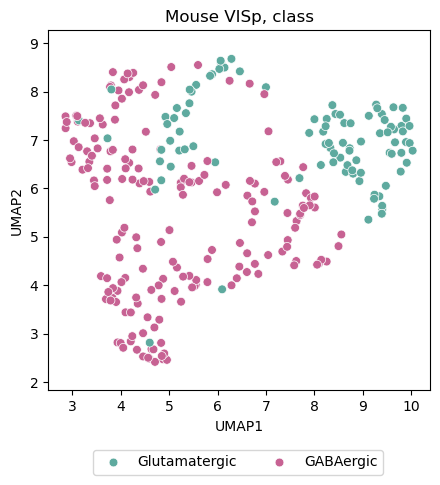

In [109]:
hue_by = 'tree_class'

plt.figure(figsize=(4.5, 5))
#ax=sns.scatterplot(data=features_human_ephys_2, x='UMAP3', y='UMAP4', color= "lightgray")
ax=sns.scatterplot(data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by,
    s=40,
    palette = color_dict
                  )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Mouse VISp, class', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(0.1, -0.2), ncol=2)
#plt.savefi
plt.tight_layout()
plt.savefig('../results/UMAPS/UMAP_MouseVISp.jpg', dpi=300, bbox_inches='tight')


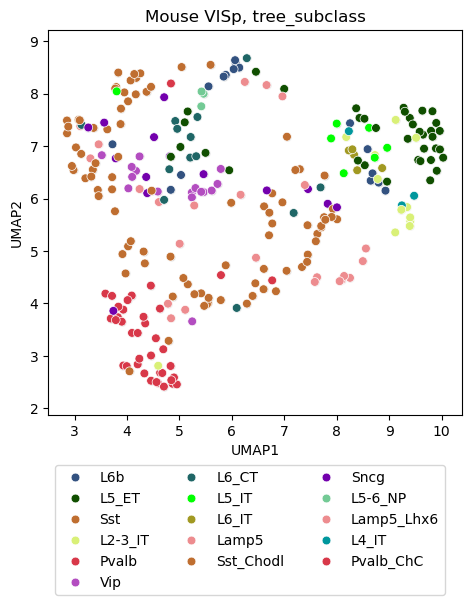

In [110]:
hue_by = 'tree_subclass'
plt.figure(figsize=(5,6.5))
ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, s=40, palette = color_dict
                  )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(0, -0.3), ncol=3)
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

In [111]:
features_mouseVISp_ephys['tree_subclass'].unique()

array(['L6b', 'L5_ET', 'Sst', 'L2-3_IT', 'Pvalb', 'Vip', 'L6_CT', 'L5_IT',
       'L6_IT', 'Lamp5', 'Sst_Chodl', 'Sncg', 'L5-6_NP', 'Lamp5_Lhx6',
       'L4_IT', 'Pvalb_ChC'], dtype=object)

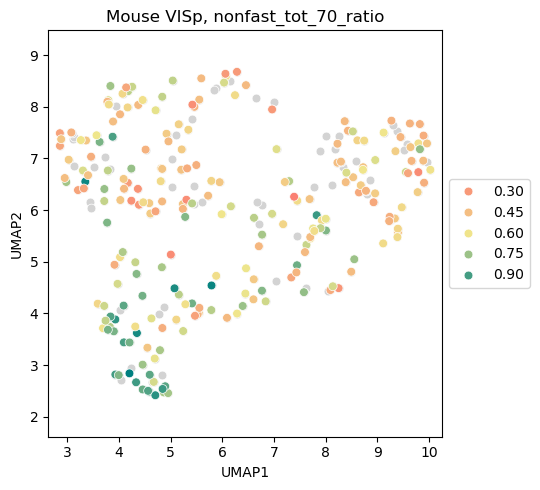

In [132]:
hue_by = 'nonfast_tot_70_ratio'
plt.figure(figsize=(5.5,5))

salmon_to_teal = LinearSegmentedColormap.from_list('salmon_to_teal', ['salmon', 'khaki', 'teal'], N=256)

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

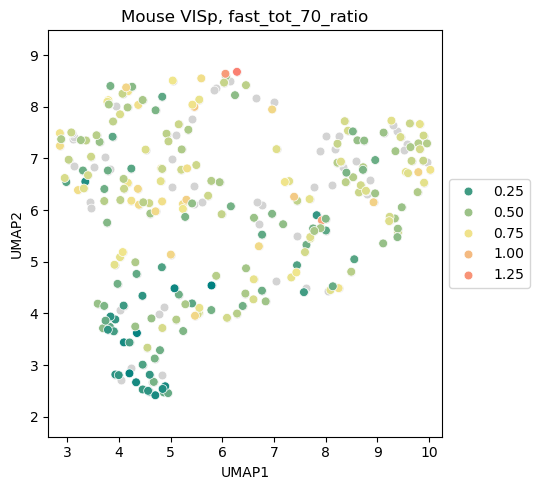

In [133]:
hue_by = 'fast_tot_70_ratio'

plt.figure(figsize=(5.5,5))

teal_to_salmon = LinearSegmentedColormap.from_list('teal_to_salmon', ['teal', 'khaki','salmon'], N=256)

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue= hue_by, 
    s=40, 
    palette = teal_to_salmon
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

In [134]:
# not using total but sum of fast and nonfast for ratio calculation
features_mouseVISp_ephys['ratio_fast_tot70_calc'] = features_mouseVISp_ephys['fast_tot_70_ratio'] / (features_mouseVISp_ephys['fast_tot_70_ratio'] + features_mouseVISp_ephys['nonfast_tot_70_ratio'])

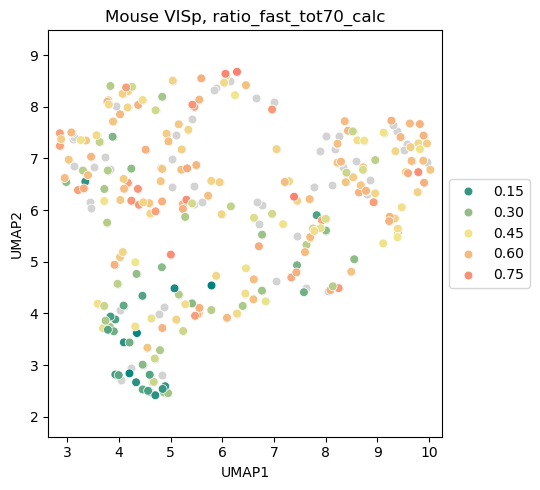

In [135]:
hue_by = 'ratio_fast_tot70_calc'
plt.figure(figsize=(5.5,5))

teal_to_salmon = LinearSegmentedColormap.from_list('teal_to_salmon', ['teal', 'khaki','salmon'], N=256)

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = teal_to_salmon
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

### Plot by fast and non fast. No ratio

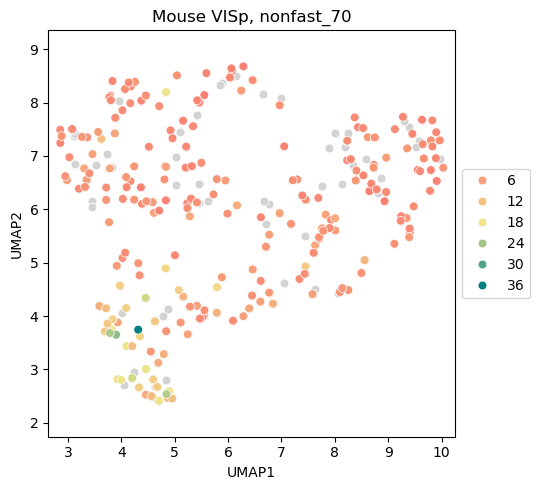

In [136]:
# linear scale
hue_by = 'nonfast_70'
plt.figure(figsize=(5.5,5))

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

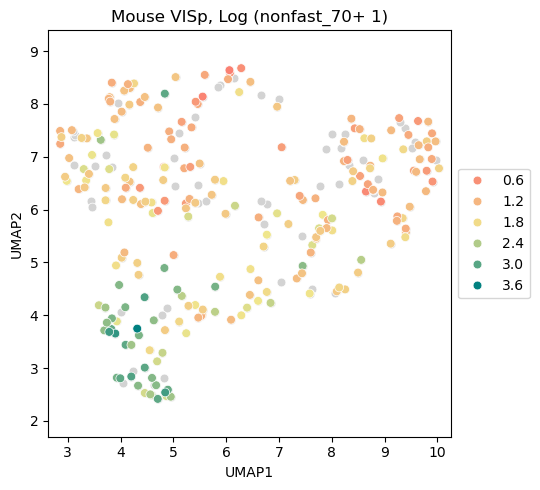

In [137]:
# log scale
hue_by = 'nonfast_70'
plt.figure(figsize=(5.5,5))

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=np.log(features_mouseVISp_ephys[hue_by]+1), 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, Log ({hue_by}+ 1)', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_log_{hue_by}.jpg', dpi=300)#'UMAP.svg')

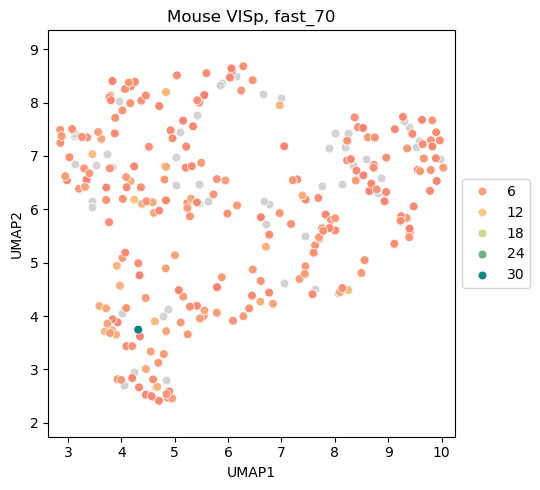

In [138]:
# linear scale
hue_by = 'fast_70'
plt.figure(figsize=(5.5,5))

salmon_to_teal = LinearSegmentedColormap.from_list('salmon_to_teal', ['salmon', 'khaki', 'teal'], N=256)

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_{hue_by}.jpg', dpi=300)#'UMAP.svg')

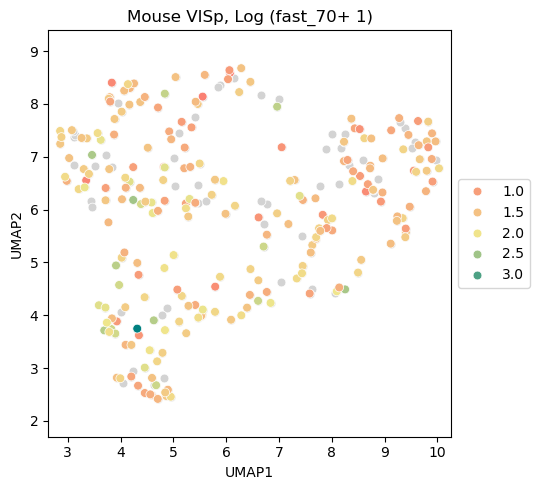

In [139]:
# log scale
hue_by = 'fast_70'
plt.figure(figsize=(5.5,5))

salmon_to_teal = LinearSegmentedColormap.from_list('salmon_to_teal', ['salmon', 'khaki', 'teal'], N=256)

ax=sns.scatterplot(data=features_mouseVISp_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseVISp_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=np.log(features_mouseVISp_ephys[hue_by] + 1), 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse VISp, Log ({hue_by}+ 1)', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAPS/UMAP_MouseVISp_log_{hue_by}.jpg', dpi=300)#'UMAP.svg')